
Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [43]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [44]:
import pandas as pd

pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 10)

In [45]:
npi_data = pd.read_csv('./data.csv')
npi_data

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18,2,2,2,2,1,2,1,2,2,2,1,1,2,1,1,1,2,1,1,1,1,1,1,2,2,2,1,2,2,2,1,2,1,1,1,2,2,2,1,2,211,1,50
1,6,2,2,2,1,2,2,1,2,1,1,2,2,2,1,2,2,1,1,2,1,2,2,1,2,2,2,2,1,2,2,2,1,2,2,1,2,2,2,2,1,149,1,40
2,27,1,2,2,1,2,1,2,1,2,2,2,1,1,1,1,1,2,2,1,1,2,2,2,2,1,2,1,1,2,1,2,2,1,1,2,1,1,2,1,2,168,1,28
3,29,1,1,2,2,2,1,2,1,1,2,1,1,1,1,1,1,2,2,1,2,1,1,1,2,1,2,1,2,2,1,1,2,1,1,2,1,2,2,1,1,230,1,37
4,6,1,2,1,1,1,2,1,2,1,2,2,2,2,2,1,1,1,1,1,1,1,2,1,2,2,1,2,1,2,2,2,1,2,2,1,2,2,2,0,1,389,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1,2,2,2,1,1,2,1,2,1,1,1,2,2,2,1,2,1,1,1,1,2,1,1,2,2,1,2,1,2,2,2,1,2,2,1,2,2,2,2,1,243,1,24
11239,10,2,2,1,1,1,2,1,1,1,2,2,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,1,1,2,2,1,2,2,1,2,1,2,2,1,197,1,39
11240,6,1,2,2,1,1,2,1,2,1,1,2,2,2,2,1,2,1,2,2,1,2,1,1,2,2,2,2,1,1,2,1,1,2,2,1,2,2,2,2,1,447,2,33
11241,12,2,2,1,1,1,1,1,1,1,2,2,2,2,2,1,1,2,2,2,1,2,1,1,2,2,1,2,1,1,2,2,1,1,1,2,2,2,2,2,1,167,1,24


In [46]:
import numpy as np

npi_data.replace(0, np.nan, inplace=True)
npi_data

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,211,1.0,50.0
1,6.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,149,1.0,40.0
2,27.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,168,1.0,28.0
3,29.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,230,1.0,37.0
4,6.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,389,1.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,243,1.0,24.0
11239,10.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,197,1.0,39.0
11240,6.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,447,2.0,33.0
11241,12.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,167,1.0,24.0


In [47]:
npi_data['Q10'].value_counts(normalize=True)                        

2.0    0.515536
1.0    0.484464
Name: Q10, dtype: float64

In [48]:
npi_data.describe()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,11159.000000,11226.000000,11220.000000,11223.000000,11214.000000,11220.000000,11226.000000,11220.000000,11221.000000,11201.000000,11200.000000,11219.000000,11191.000000,11195.000000,11204.000000,11211.000000,11222.000000,11196.000000,11207.000000,11208.000000,11207.000000,11208.000000,11208.000000,11216.000000,11199.000000,11204.000000,11220.000000,11211.000000,11202.000000,11202.000000,11181.000000,11204.000000,11195.000000,11201.000000,11206.000000,11180.000000,11216.000000,11198.000000,11205.000000,11202.000000,11209.000000,1.124300e+04,11231.000000,11231.000000
mean,13.399767,1.387850,1.788503,1.831061,1.177278,1.425223,1.630857,1.305615,1.415382,1.461566,1.515536,1.551743,1.567599,1.673426,1.743663,1.218981,1.551862,1.268131,1.333898,1.286492,1.264388,1.779265,1.384993,1.157810,1.693187,1.776330,1.518806,1.740434,1.199072,1.566149,1.682676,1.586844,1.302456,1.550308,1.673389,1.264669,1.811965,1.695481,1.852120,1.612837,1.419217,1.195542e+05,1.431484,34.050574
std,8.461895,0.487282,0.408388,0.374715,0.381921,0.494399,0.482594,0.460688,0.492810,0.498543,0.499781,0.497338,0.495431,0.468981,0.436630,0.413574,0.497325,0.443006,0.471625,0.452142,0.441027,0.414761,0.486615,0.364579,0.461192,0.416722,0.499668,0.438416,0.399320,0.495627,0.465456,0.492422,0.459342,0.497485,0.468994,0.441177,0.390757,0.460224,0.354997,0.487123,0.493453,1.262668e+07,0.502445,14.982386
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000e+00,1.000000,2.000000
25%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.040000e+02,1.000000,23.000000
50%,12.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.570000e+02,1.000000,30.000000
75%,18.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.410000e+02,2.000000,43.000000
max,40.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.338845e+09,3.000000,509.000000


In [49]:
npi_data=npi_data.mask(npi_data==0).fillna(npi_data.median())
npi_data.describe()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.00000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.00000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,1.124300e+04,11243.000000,11243.000000
mean,13.389309,1.387263,1.788935,1.831362,1.176821,1.424353,1.631415,1.304990,1.414569,1.459842,1.517389,1.552699,1.569599,1.674820,1.744552,1.218358,1.552699,1.267011,1.332829,1.28560,1.263542,1.779952,1.383794,1.157431,1.694388,1.777106,1.51979,1.741172,1.198346,1.567731,1.684426,1.588277,1.301165,1.551988,1.674464,1.263186,1.812417,1.696700,1.852619,1.614249,1.417949,1.195542e+05,1.431024,34.046251
std,8.431084,0.487146,0.408082,0.374449,0.381534,0.494266,0.482443,0.460424,0.492669,0.498407,0.499720,0.497237,0.495154,0.468463,0.436132,0.413150,0.497237,0.442418,0.471247,0.45172,0.440573,0.414297,0.486330,0.364223,0.460687,0.416206,0.49963,0.438010,0.398772,0.495413,0.464765,0.492167,0.458785,0.497312,0.468596,0.440382,0.390396,0.459704,0.354501,0.486794,0.493244,1.262668e+07,0.502375,14.974972
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000e+00,1.000000,2.000000
25%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.040000e+02,1.000000,23.000000
50%,12.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.570000e+02,1.000000,30.000000
75%,18.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.410000e+02,2.000000,43.000000
max,40.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.338845e+09,3.000000,509.000000


In [50]:
npi_data.isnull().sum()

score     0
Q1        0
Q2        0
Q3        0
Q4        0
         ..
Q39       0
Q40       0
elapse    0
gender    0
age       0
Length: 44, dtype: int64

In [51]:
npi_data.shape

(11243, 44)

In [52]:
# look at age value counts for whole dataset

npi_data['Q10'].value_counts()

2.0    5817
1.0    5426
Name: Q10, dtype: int64

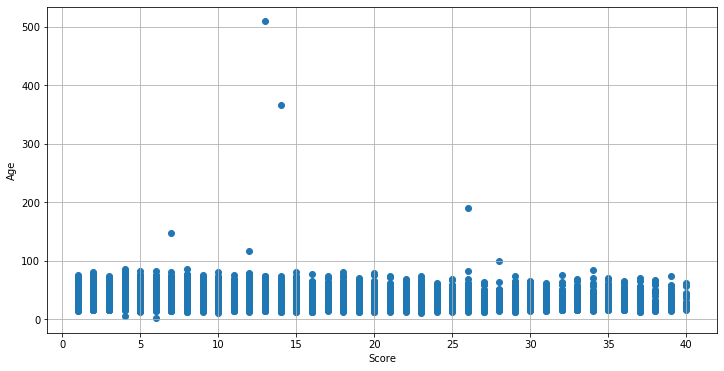

In [53]:
import matplotlib.pyplot as plt

# indentify outliers for age by using scatter plot 

fig, ax = plt.subplots(figsize=(12,6))
ax.grid()


ax.scatter(npi_data['score'], npi_data['age'])
ax.set_xlabel('Score')
ax.set_ylabel('Age')
plt.show()

In [54]:
# set age range for 15-100 years old for dataset 

index = npi_data[(npi_data['age'] >= 100)|(npi_data['age'] <= 15)].index
npi_data.drop(index, inplace=True)
npi_data['age'].describe()

count    11033.000000
mean        34.301097
std         13.650684
min         16.000000
25%         23.000000
50%         31.000000
75%         44.000000
max         86.000000
Name: age, dtype: float64

In [55]:
# clean gender column
# omitt useless gender from dataset '0'

index2 = npi_data[(npi_data['gender'] == 0)].index
npi_data.drop(index2, inplace=True)
npi_data['gender'].describe()

count    11033.000000
mean         1.429620
std          0.501412
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: gender, dtype: float64

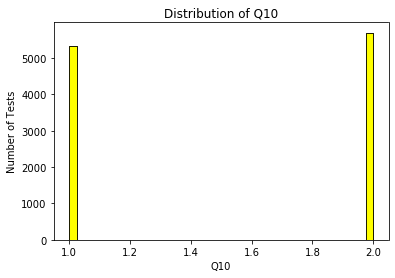

In [56]:
import seaborn as sns

# matplotlib histogram for distribution of scores
# historgram formatting

plt.hist(npi_data['Q10'], color = 'yellow', edgecolor = 'black',
         bins = 40)

sns.distplot(npi_data['Q10'], hist=True, kde=False, 
             bins=40, color = 'yellow',
             hist_kws={'edgecolor':'black'})

# add labels and title to histogram

plt.title('Distribution of Q10')
plt.xlabel('Q10')
plt.ylabel('Number of Tests')

plt.show()

In [57]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(npi_data, test_size=0.3,
                              stratify = npi_data['gender'], random_state = 42)

train.shape, test.shape

((7723, 44), (3310, 44))

In [58]:
test, val = train_test_split(test, test_size=0.5,
                              stratify = test['gender'], random_state = 42)

train.shape, test.shape, val.shape

((7723, 44), (1655, 44), (1655, 44))

In [59]:
target = 'Q10'
X_test = test.drop(columns=target)
y_test = test[target]
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

### XGB Classifier 

In [60]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(random_state=42)
)
pipeline.fit(X_train, y_train)
print(f'Val score (acc): {pipeline.score(X_val, y_val)}')

Val score (acc): 0.7915407854984894


In [61]:
from sklearn.metrics import roc_auc_score

y_pred = pipeline.predict(X_val)
roc_auc_score(y_pred, y_val)

0.7917762196903301

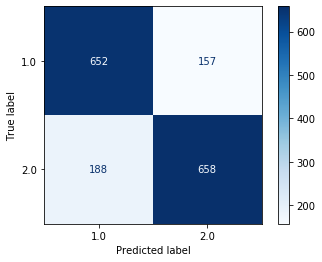

In [62]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='horizontal', 
                      values_format='.0f',
                      cmap='Blues');

In [63]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipeline,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('ordinalencoder',
                                                 OrdinalEncoder(cols=[],
                                                                drop_invariant=False,
                                                                handle_missing='value',
                                                                handle_unknown='value',
                                                                mapping=[],
                                                                return_df=True,
                                                                verbose=0)),
                                                ('xgbclassifier',
                                                 XGBClassifier(base_score=0.5,
                                                               booster='gbtree',
                                                  

In [64]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)

Q5      -0.003988
Q40     -0.003263
Q17     -0.001813
Q15     -0.001692
Q18     -0.000846
           ...   
Q13      0.004955
Q1       0.011964
Q36      0.018973
Q33      0.065861
score    0.144290
Length: 43, dtype: float64

In [65]:
permuter.feature_importances_std_

array([0.00953382, 0.00331832, 0.00233705, 0.00072508, 0.0006619 ,
       0.00367737, 0.00311867, 0.00045216, 0.0007643 , 0.00085451,
       0.00271298, 0.00081962, 0.00134568, 0.00355213, 0.00129028,
       0.        , 0.00183272, 0.00029601, 0.        , 0.00173447,
       0.00085451, 0.00048338, 0.00105351, 0.00196351, 0.00187214,
       0.        , 0.        , 0.00232452, 0.00173447, 0.        ,
       0.00024169, 0.00274509, 0.00704647, 0.00137786, 0.00130155,
       0.00277156, 0.00029601, 0.00318355, 0.00024169, 0.00193353,
       0.00302356, 0.00024169, 0.00212771])

In [66]:
eli5.show_weights(permuter, 
                  top=None, 
                  feature_names=feature_names)

Weight,Feature
0.1443 ± 0.0191,score
0.0659 ± 0.0141,Q33
0.0190 ± 0.0055,Q36
0.0120 ± 0.0066,Q1
0.0050 ± 0.0027,Q13
0.0044 ± 0.0047,Q2
0.0044 ± 0.0054,Q11
0.0039 ± 0.0062,Q6
0.0025 ± 0.0064,Q38
0.0024 ± 0.0028,Q34


In [67]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(random_state=42, n_estimators=1000,
                 max_depth=3, learning_rate=0.6, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
print(f'Val score (acc): {pipeline.score(X_val, y_val)}')

Val score (acc): 0.8574018126888218


In [69]:
pipeline.fit(X_train, y_train)
print(f'Test score (acc): {pipeline.score(X_test, y_test)}')

Test score (acc): 0.8561933534743202


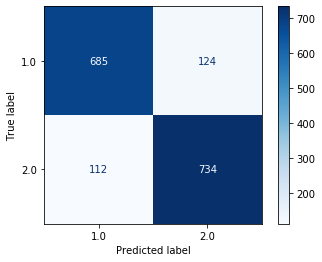

In [70]:
plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='horizontal', 
                      values_format='.0f',
                      cmap='Blues');

In [73]:
y_pred = pipeline.predict(X_test)

In [74]:
roc_auc_score(y_pred, y_test)

0.8563373016570829

In [80]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['score', 'Q33']

interaction = pdp_interact(
    model = pipeline,
    dataset = X_val,
    model_features = X_val.columns,
    features = features 
)    

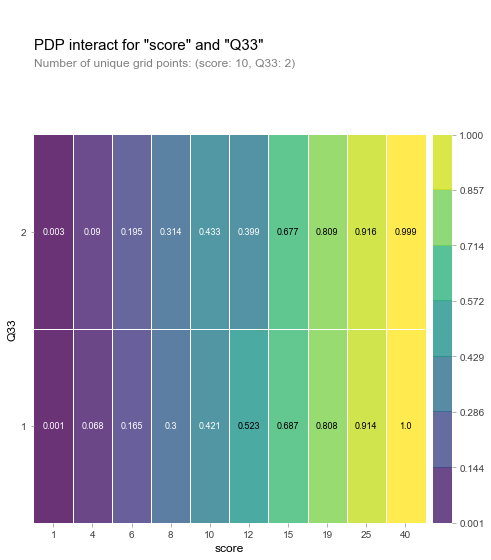

In [81]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);